### Random Forest using Sampling Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from tqdm import tqdm

df_s1 = pd.read_csv('sample1.csv')
df_s2 = pd.read_csv('sample2.csv')
df_s3 = pd.read_csv('sample3.csv')

In [2]:
def preProcess(data):
    X_train, X_test, y_train, y_test = train_test_split(data['full_log'], data['level'], test_size=0.2, random_state=96)
    # full_log에서 숫자는 마스킹 처리.
    X_train = X_train.str.replace(r'[0-9]', '<num>')
    X_test = X_test.str.replace(r'[0-9]', '<num>')
    # to list
    train_text = list(X_train)
    train_level = np.array(y_train)
    # CountVectorizer
    vectorizer = CountVectorizer(analyzer = 'word', max_features = 10000)
    train_features = vectorizer.fit_transform(train_text)
    # Model Development (Split validation set)
    X_train, X_valid, y_train, y_valid = train_test_split(train_features, train_level, test_size=0.25, random_state=42)
    test_text = list(X_test)
    test_level = np.array(y_test)
    test_features = vectorizer.transform(test_text)
    return X_train, X_valid, y_train, y_valid, test_features, y_test

In [3]:
# Score Metrics
from sklearn import metrics
def macro_f1(result_df):
    
    true = result_df['True']
    pred = result_df['Pred']
    
    score = metrics.f1_score(y_true=true, y_pred=pred, average='macro')
    
    return score
def macro_recall(result_df):
    true = result_df['True']
    pred = result_df['Pred']
    # Generate the confusion matrix
    cm = confusion_matrix(true, pred)
    # Calculate recall for each class
    recalls = np.diag(cm) / np.sum(cm, axis=1)
    # Calculate macro recall by averaging recalls
    macro_recall = np.nanmean(recalls)  # Use nanmean to handle classes with 0 instances in y_true
    return macro_recall

### 1) RF_Sample 1

In [3]:
# preProcess Data
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s1)

In [53]:
# Define the parameter grid to search
rf_param_grid = {
    'n_estimators': [1, 50, 100],  # Number of trees in the forest
    #'max_depth': [1, 2, 3, 4],  # Maximum depth of the tree
}

# Initialize the classifier
rf1 = RandomForestClassifier()

# Initialize the Grid Search model
grid_search_rf1 = GridSearchCV(estimator=rf1, param_grid=rf_param_grid, cv=5, scoring='recall_macro')

# Fit the grid search to the data
grid_search_rf1.fit(X_train, y_train)

# Best hyperparameters
print(grid_search_rf1.best_params_)

{'n_estimators': 100}


In [54]:
pd.DataFrame(grid_search_rf1.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'n_estimators': 1},0.982883,0.003539
1,{'n_estimators': 50},0.988259,0.001600
2,{'n_estimators': 100},0.988366,0.001468


In [58]:
# Validation Performance
val_pred = grid_search_rf1.best_estimator_.predict(X_valid)
result_rf_val1 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_r1 = macro_f1(result_rf_val1)
recall_rf1 = macro_recall(result_rf_val1)
print("[RF for Sample_1] Macro F1 Score = ", f1_r1)
print("[RF for Sample_1] Macro Recall = ", recall_rf1)

[RF for Sample_1] Macro Recall =  0.9942159268018286
[RF for Sample_1] Macro Recall =  0.9920028994929287


### 2) RF Sample 2

In [59]:
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s2)

In [60]:
# Initialize the classifier
rf2 = RandomForestClassifier()

# Initialize the Grid Search model
grid_search_rf2 = GridSearchCV(estimator=rf2, param_grid=rf_param_grid, cv=5, scoring='recall_macro')

# Fit the grid search to the data
grid_search_rf2.fit(X_train, y_train)

# Best hyperparameters
print(grid_search_rf2.best_params_)

{'n_estimators': 100}


In [62]:
pd.DataFrame(grid_search_rf2.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'n_estimators': 1},0.984327,0.002545
1,{'n_estimators': 50},0.990118,0.001975
2,{'n_estimators': 100},0.990307,0.002511


In [64]:
# Validation Performance
val_pred = grid_search_rf2.best_estimator_.predict(X_valid)
result_rf_val2 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_r2 = macro_f1(result_rf_val2)
recall_rf2 = macro_recall(result_rf_val2)
print("[RF for Sample_2] Macro F1 Score = ", f1_r2)
print("[RF for Sample_2] Macro Recall = ", recall_rf2)

[RF for Sample_2] Macro F1 Score =  0.991508088263535
[RF for Sample_2] Macro Recall =  0.9889846644130609


### 3) RF Sample 3

In [65]:
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s3)
# Initialize the classifier
rf3 = RandomForestClassifier()
# Initialize the Grid Search model
grid_search_rf3 = GridSearchCV(estimator=rf3, param_grid=rf_param_grid, cv=5, scoring='recall_macro')
# Fit the grid search to the data
grid_search_rf3.fit(X_train, y_train)
# Best hyperparameters
print(grid_search_rf3.best_params_)

{'n_estimators': 100}


In [66]:
pd.DataFrame(grid_search_rf3.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,{'n_estimators': 1},0.984998,0.002703
1,{'n_estimators': 50},0.995864,0.001384
2,{'n_estimators': 100},0.996061,0.001805


In [67]:
# Validation Performance
val_pred = grid_search_rf3.best_estimator_.predict(X_valid)
result_rf_val3 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_r3 = macro_f1(result_rf_val3)
recall_rf3 = macro_recall(result_rf_val3)
print("[RF for Sample_2] Macro F1 Score = ", f1_r3)
print("[RF for Sample_2] Macro Recall = ", recall_rf3)

[RF for Sample_2] Macro F1 Score =  0.9955430316619064
[RF for Sample_2] Macro Recall =  0.9954034769895754


## RF Model Selection (Sample 3)

In [69]:
# Test set prediction for sample 3
test_pred = grid_search_rf3.best_estimator_.predict(test_features)
test_crosstab = pd.crosstab(y_test, test_pred, rownames = ['True'], colnames = ['Pred'])
result_test_rf = pd.DataFrame({'True': y_test, 'Pred': test_pred})
print("[Test] Macro F1 Score = ", macro_f1(result_test_rf))
print("[Test] Macro Recall Score = ", macro_recall(result_test_rf))

[Test] Macro F1 Score =  0.993770656184195
[Test] Macro Recall Score =  0.993832284857615


# XGBosost

In [4]:
# Model Devleopment
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### 1) XGBoost Sample 1

In [22]:
# Load Data
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s1)
# Define XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
xgb_param_grid = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
xgb_grid_search1 = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='recall_macro', n_jobs=-1, cv=5)

# Fit GridSearchCV
xgb_grid_search1.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", xgb_grid_search1.best_params_)
print("Best Score:", xgb_grid_search1.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3}
Best Score: 0.9883841302215698


In [23]:
pd.DataFrame(xgb_grid_search1.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.01, 'max_depth': 1}",0.768638,0.009341
1,"{'learning_rate': 0.01, 'max_depth': 2}",0.926331,0.004686
2,"{'learning_rate': 0.01, 'max_depth': 3}",0.975613,0.005698
3,"{'learning_rate': 0.1, 'max_depth': 1}",0.955064,0.007503
4,"{'learning_rate': 0.1, 'max_depth': 2}",0.984936,0.002260
5,"{'learning_rate': 0.1, 'max_depth': 3}",0.987962,0.001303
6,"{'learning_rate': 0.2, 'max_depth': 1}",0.983606,0.001623
7,"{'learning_rate': 0.2, 'max_depth': 2}",0.988041,0.001532
8,"{'learning_rate': 0.2, 'max_depth': 3}",0.988384,0.001661


In [24]:
# Validation Performance
val_pred = xgb_grid_search1.best_estimator_.predict(X_valid)
result_xgb_val1 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_xgb1 = macro_f1(result_xgb_val1)
recall_xgb1 = macro_recall(result_xgb_val1)
print("[XGB for Sample_1] Macro F1 Score = ", f1_xgb1)
print("[XGB for Sample_1] Macro Recall = ", recall_xgb1)

[XGB for Sample_1] Macro F1 Score =  0.9945179029796252
[XGB for Sample_1] Macro Recall =  0.9919110469347556


### 2) XGBoost Sample 2

In [12]:
# Load Data
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s2)
# Define XGBoost model
xgb_clf2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
xgb_param_grid2 = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
xgb_grid_search2 = GridSearchCV(estimator=xgb_clf2, param_grid=xgb_param_grid2, scoring='recall_macro', n_jobs=-1, cv=5)

# Fit GridSearchCV
xgb_grid_search2.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", xgb_grid_search2.best_params_)
print("Best Score:", xgb_grid_search2.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 2}
Best Score: 0.9903870639142113


In [13]:
pd.DataFrame(xgb_grid_search2.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.01, 'max_depth': 1}",0.780537,0.010481
1,"{'learning_rate': 0.01, 'max_depth': 2}",0.928141,0.003736
2,"{'learning_rate': 0.01, 'max_depth': 3}",0.983537,0.002130
3,"{'learning_rate': 0.1, 'max_depth': 1}",0.974304,0.005126
4,"{'learning_rate': 0.1, 'max_depth': 2}",0.988017,0.003070
5,"{'learning_rate': 0.1, 'max_depth': 3}",0.990149,0.002665
6,"{'learning_rate': 0.2, 'max_depth': 1}",0.985603,0.001227
7,"{'learning_rate': 0.2, 'max_depth': 2}",0.990387,0.002460
8,"{'learning_rate': 0.2, 'max_depth': 3}",0.990181,0.002216


In [17]:
# Validation Performance
val_pred = xgb_grid_search2.best_estimator_.predict(X_valid)
result_xgb_val2 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_xgb2 = macro_f1(result_xgb_val2)
recall_xgb2 = macro_recall(result_xgb_val2)
print("[XGB for Sample_2] Macro F1 Score = ", f1_xgb2)
print("[XGB for Sample_2] Macro Recall = ", recall_xgb2)

[XGB for Sample_2] Macro F1 Score =  0.9933757118915105
[XGB for Sample_2] Macro Recall =  0.988665212859024


### 3) XGBoost Sample 3

In [25]:
# Load Data
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s3)
# Define XGBoost model
xgb_clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
xgb_param_grid3 = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
xgb_grid_search3 = GridSearchCV(estimator=xgb_clf3, param_grid=xgb_param_grid3, scoring='recall_macro', n_jobs=-1, cv=5)

# Fit GridSearchCV
xgb_grid_search3.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", xgb_grid_search3.best_params_)
print("Best Score:", xgb_grid_search3.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 2}
Best Score: 0.9943557921848502


In [26]:
pd.DataFrame(xgb_grid_search3.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.01, 'max_depth': 1}",0.881486,0.007259
1,"{'learning_rate': 0.01, 'max_depth': 2}",0.963035,0.003939
2,"{'learning_rate': 0.01, 'max_depth': 3}",0.980178,0.004474
3,"{'learning_rate': 0.1, 'max_depth': 1}",0.984041,0.003717
4,"{'learning_rate': 0.1, 'max_depth': 2}",0.994168,0.002747
5,"{'learning_rate': 0.1, 'max_depth': 3}",0.994164,0.002175
6,"{'learning_rate': 0.2, 'max_depth': 1}",0.993609,0.001831
7,"{'learning_rate': 0.2, 'max_depth': 2}",0.994356,0.001457
8,"{'learning_rate': 0.2, 'max_depth': 3}",0.994354,0.001180


In [27]:
# Validation Performance
val_pred = xgb_grid_search3.best_estimator_.predict(X_valid)
result_xgb_val3 = pd.DataFrame({'True': y_valid, 'Pred': val_pred})
f1_xgb3 = macro_f1(result_xgb_val3)
recall_xgb3 = macro_recall(result_xgb_val3)
print("[XGB for Sample_3] Macro F1 Score = ", f1_xgb3)
print("[XGB for Sample_3] Macro Recall = ", recall_xgb3)

[XGB for Sample_3] Macro F1 Score =  0.9966699835736567
[XGB for Sample_3] Macro Recall =  0.9966031074139912


# XGB Model Selection (Sample)

In [29]:
# Test set prediction for sample 3 XGB
test_pred_xgb = xgb_grid_search3.best_estimator_.predict(test_features)
test_crosstab_xgb = pd.crosstab(y_test, test_pred_xgb, rownames = ['True'], colnames = ['Pred'])
result_test_xgb = pd.DataFrame({'True': y_test, 'Pred': test_pred_xgb})
print("[Test] XGB Macro F1 Score = ", macro_f1(result_test_xgb))
print("[Test] XGB Macro Recall Score = ", macro_recall(result_test_xgb))

[Test] XGB Macro F1 Score =  0.9943373701375134
[Test] XGB Macro Recall Score =  0.9943768571372085


# Performance Evaluation

In [48]:
eval = {
    "Model": ["RF_1", "RF_2", "RF_3", "XGB_1", "XGB_2", "XGB_3"],
    "Macro_F1Score": [0.9942159268018286, 0.991508088263535, 0.9955430316619064, 0.9945179029796252, 0.9933757118915105, 0.9966699835736567],
    "Macro_Recall": [0.9920028994929287, 0.9889846644130609, 0.9954034769895754, 0.9919110469347556, 0.988665212859024, 0.9966031074139912]
}

# Round the score values to a format of 0.000
eval['Macro_F1Score'] = [round(score, 3) for score in eval['Macro_F1Score']]
eval['Macro_Recall'] = [round(score, 3) for score in eval['Macro_Recall']]

# Create a DataFrame with the rounded values
eval_result = pd.DataFrame(eval)
eval_result

,Model,Macro_F1Score,Macro_Recall
0,RF_1,0.994,0.992
1,RF_2,0.992,0.989
2,RF_3,0.996,0.995
3,XGB_1,0.995,0.992
4,XGB_2,0.993,0.989
5,XGB_3,0.997,0.997


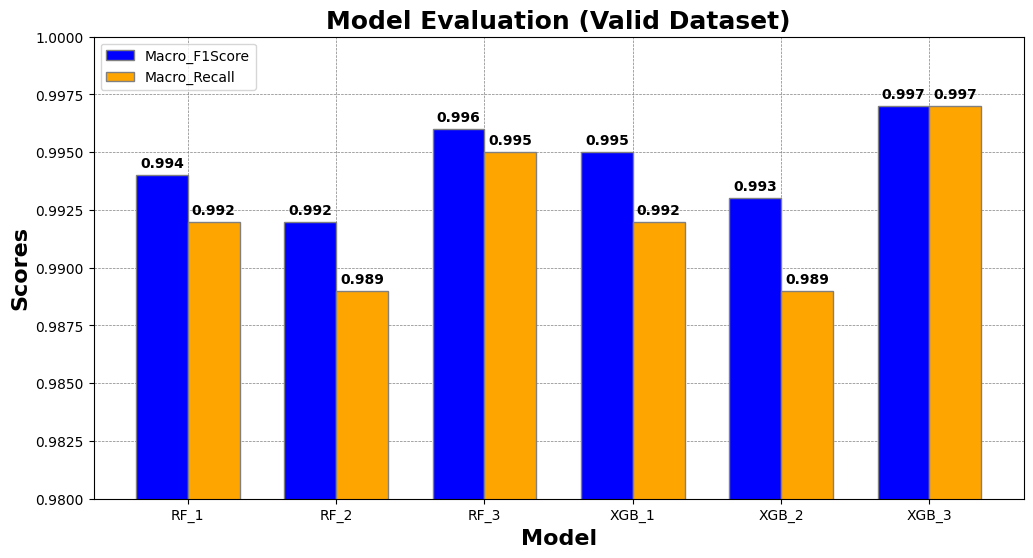

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
r1 = range(len(eval_result['Macro_F1Score']))
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, eval_result['Macro_F1Score'], color='blue', width=bar_width, edgecolor='grey', label='Macro_F1Score')
bars2 = ax.bar(r2, eval_result['Macro_Recall'], color='orange', width=bar_width, edgecolor='grey', label='Macro_Recall')

# Add xticks on the middle of the group bars
ax.set_xlabel('Model', fontweight='bold', fontsize = 16)
ax.set_ylabel('Scores', fontweight='bold', fontsize = 16)
ax.set_xticks([r + bar_width/2 for r in range(len(eval_result['Macro_F1Score']))])
ax.set_xticklabels(eval_result['Model'])

# Set the y-axis limit to better visualize the differences
ax.set_ylim([0.98, 1.0])

# Adjust the placement of the value annotations to be closer to the bars
vertical_offset = 0.0002  # Adjust this value as needed to position the text closer to the bars

# Loop over the bars and use ax.text() to put the value on top of each bar, using '.3f' to round to three decimal places
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + vertical_offset, '%.3f' % height, ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height + vertical_offset, '%.3f' % height, ha='center', va='bottom', fontweight='bold')

# Enable grid lines on the y-axis
ax.yaxis.grid(True)  # Turn on grid lines for the y-axis only
# Optional: Make the grid lines less prominent if desired
ax.set_axisbelow(True)  # Ensures the grid lines are below the bars
plt.grid(color='gray', linestyle='dashed', linewidth=0.5)

# Create legend & Show graphic
ax.legend(loc='upper left')
plt.title('Model Evaluation (Valid Dataset)', fontsize = 18, fontweight='bold')
plt.show()

In [84]:
# Test set prediction for sample 3 XGB
test_pred_xgb = xgb_grid_search3.best_estimator_.predict(test_features)
test_crosstab_xgb = pd.crosstab(y_test, test_pred_xgb, rownames = ['True'], colnames = ['Pred'])
result_test_xgb = pd.DataFrame({'True': y_test, 'Pred': test_pred_xgb})
print("[Test] XGB Macro F1 Score = ", macro_f1(result_test_xgb))
print("[Test] XGB Macro Recall Score = ", macro_recall(result_test_xgb))

[Test] XGB Macro F1 Score =  0.9943373701375134
[Test] XGB Macro Recall Score =  0.9943768571372085


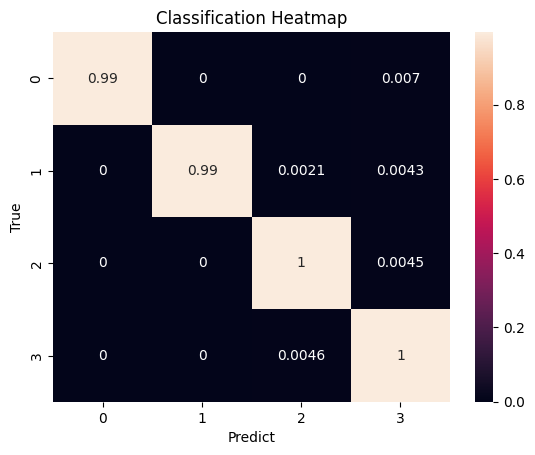

In [65]:
# Confusion Matrix
cm_final = confusion_matrix(y_test, test_pred_xgb)
total = np.sum(cm_final, axis = 1)
cm_norm_final = cm_final/total[:,None]
sns.heatmap(cm_norm_final, annot=True)
plt.title("Classification Heatmap")
plt.xlabel("Predict")
plt.ylabel("True")
plt.show()

# Extra Work

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Load Data
X_train, X_valid, y_train, y_valid, test_features, y_test = preProcess(df_s3)

In [80]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [81]:
y_pred = logreg.predict(test_features)

In [83]:
# Test set prediction for sample 3 XGB
result_test_logreg = pd.DataFrame({'True': y_test, 'Pred': y_pred})
print("[Test] Log.Reg Macro F1 Score = ", macro_f1(result_test_logreg))
print("[Test] Log.Reg Macro Recall Score = ", macro_recall(result_test_logreg))

[Test] Log.Reg Macro F1 Score =  0.9937980858033848
[Test] Log.Reg Macro Recall Score =  0.993838967562774


In [85]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
# Initialize the model
nb_classifier = GaussianNB()
X_train_dense = X_train.toarray()
nb_classifier.fit(X_train_dense, y_train)

GaussianNB()

In [86]:
# Predict Test dataset
test_pred_nb = nb_classifier.predict(test_features.toarray())
test_crosstab_nb = pd.crosstab(y_test, test_pred_nb, rownames = ['True'], colnames = ['Pred'])
result_nb = pd.DataFrame({'True': y_test, 'Pred': test_pred_nb})
print("[Test] Naive Bayes Macro F1 Score = ", macro_f1(result_nb))
print("[Test] Naive Bayes Macro Recall Score = ", macro_recall(result_nb))

[Test] Naive Bayes Macro F1 Score =  0.9770522636867556
[Test] Naive Bayes Macro Recall Score =  0.9774792739415433
